In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extracted-frames/extracted_frames/frame_00335.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00247.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00218.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00012.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00220.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00324.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00488.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00458.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00475.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00415.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00295.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00300.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00288.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00563.jpg
/kaggle/input/extracted-frames/extracted_frames/frame_00371.jpg
/kaggle/input/extracted-frames/extracted

Processing video...
Reached 100 frames. Stopping extraction to save RAM.
Stitching 100 frames with good overlap...
Success! Panorama generated.


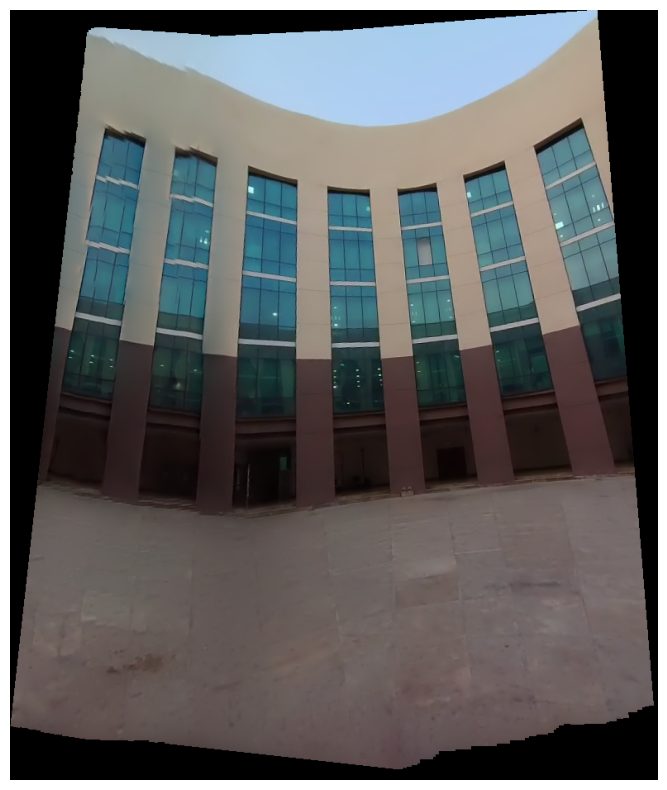

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt


VIDEO_PATH = "/kaggle/input/video-1/video_1.mp4" 
MAX_FRAMES_TO_STITCH = 100   
SKIP_INTERVAL = 5         

print(f"Processing video...")

cap = cv2.VideoCapture(VIDEO_PATH)
frames = []
count = 0

while True:
    success, frame = cap.read()
    if not success:
        break

    if count % SKIP_INTERVAL == 0:

        height, width = frame.shape[:2]
        if width > 1000:
            scale = 1000 / width
            frame = cv2.resize(frame, (0,0), fx=scale, fy=scale)
        
        frames.append(frame)
        

        if len(frames) >= MAX_FRAMES_TO_STITCH:
            print(f"Reached {MAX_FRAMES_TO_STITCH} frames. Stopping extraction to save RAM.")
            break
            
    count += 1

cap.release()

if len(frames) < 2:
    print("Error: Could not extract enough frames.")
else:
    print(f"Stitching {len(frames)} frames with good overlap...")
    

    stitcher = cv2.Stitcher_create(cv2.Stitcher_SCANS) 
    status, panorama = stitcher.stitch(frames)

    if status == cv2.Stitcher_OK:
        print("Success! Panorama generated.")
        cv2.imwrite("final_panorama.png", panorama)
        
        plt.figure(figsize=(20, 10))
        plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        print(f"Still failed. Error Code: {status}")
        print("Try changing SKIP_INTERVAL to 10 (more overlap) or 30 (less overlap).")